# Check SED catalog

- Phoenix
- Pickle

In [60]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
from IPython.display import Image, display
from PIL import Image
from scipy.interpolate import interp1d

In [61]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [62]:
index_num=0
index_val=1
index_temp=2
index_logg=3
index_logz=4
index_spec=5

In [63]:
#input_fits='sedgrid_phoenixmodels_good.fits'
#input_fits='sedgrid_pickle_uvi_selected.fits'
#input_fits='sedgrid_pickle_uvk_selected.fits'

input_fits="regenerated_sedgrid_pickle_uvi.fits"
input_fits="sedgrid_pickle_uvi_all.fits"
input_fits="sedgrid_pickle_uvk_all.fits"

In [64]:
!ls

CalibrationSpectra.ipynb
CheckGridSED.ipynb
CompareMagnitudesAndColors_regenerated.ipynb
CompareSNLSandModel.ipynb
CompareSNLSandModel_phoenix.ipynb
CompareSNLSandModel_pickles.ipynb
CompareSNLSandModel_regenerated.ipynb
D1_ab_v3.1.list
D2_ab_v3.1.list
D4_ab_v3.1.list
Extract_FewSEDSampl.ipynb
Figures
MEGACAM_FromPySynPhot.ipynb
MegaCAMTransm.ipynb
MergeSEDandMAG.ipynb
PlotSNLSSky.ipynb
README.md
ReadSNLSCatalog.ipynb
Regenerate_SED.ipynb
SNLSColors.ipynb
SNLS_catD1D2D4.csv
SNLS_col_D1D2D4.csv
SNLS_magcol_D1D2D4.csv
SelectKNearestNeighbors.ipynb
SelectSED_phoenix.ipynb
SelectSED_pickle.ipynb
ShowColorPlot_libcolors.ipynb
ShowColorPlot_libcolors2.ipynb
ShowColorPlot_libcolors2_pickles.ipynb
ShowColorPlot_libcolors2_regenerated.ipynb
ShowColorPlot_libcolors_abmag.ipynb
ab_snlscol_Noextinct.csv
ab_snlsmagnit_Noextinct.csv
all_SNLS_transm.csv
all_products_v3_2
atm-transm.png
checkwhatpysynphotdoes.py
libCFHTFilters.py
libCFHTFilters.pyc
libSNLSPhotometry.py
libSNLSPhotometry.pyc
libpysynph

In [65]:
hdul = fits.open(input_fits)

In [66]:
hdul.info()


Filename: sedgrid_pickle_uvk_all.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (8515, 132)   float64   


In [67]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8515                                                  
NAXIS2  =                  132                                                  
NBSED   =                  131                                                  
NBWLBIN =                 8510                                                  
WLMIN   =               3000.0                                                  
WLMAX   =              11510.0                                                  
WLBINWDT=                  1.0                                                  
SEDMODEL= 'pickle_uvk'                                                          
IDX_SPEC=                    5                                                  
IDX_MAG =                 85

In [68]:
 data = hdul[0].data

# Show all spectra

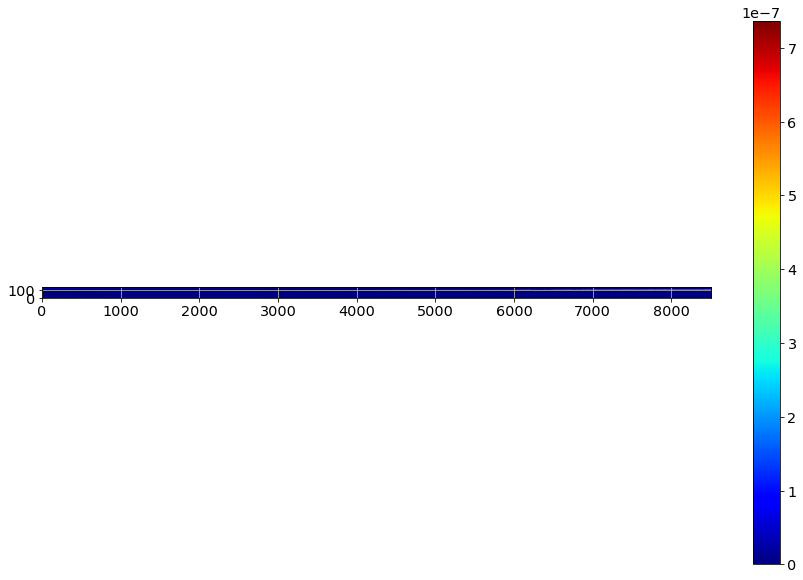

In [69]:
plt.figure(figsize=(15,10))    
img=plt.imshow(data[1:,index_spec:],origin='lower',cmap='jet')
plt.colorbar(img)
plt.grid(True)
plt.show()

# Show wavelength range

Text(0.5,0,'Wavelength index')

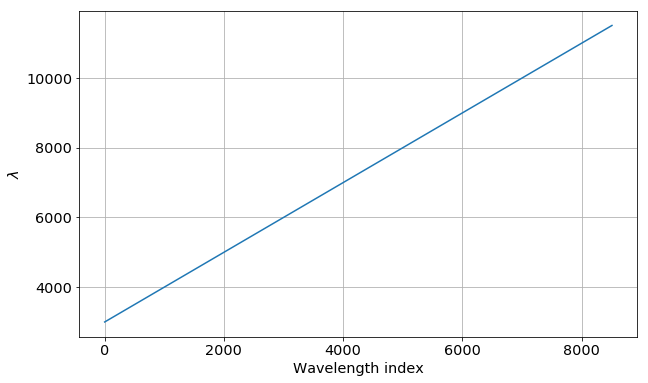

In [70]:
plt.plot(data[0,index_spec:])
plt.grid()
plt.ylabel("$\lambda$")
plt.xlabel("Wavelength index")

# Show good and bad indexes 

## Good indexes

In [71]:
good_indexes=np.where(data[0:,index_val]>0)[0]

In [72]:
good_indexes

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131])

Text(0.5,0,'temperature')

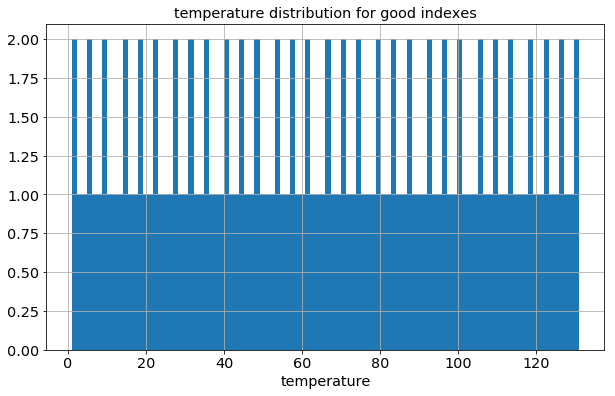

In [73]:
plt.hist(data[good_indexes,index_temp],bins=100);
plt.grid()
plt.title('temperature distribution for good indexes')
plt.xlabel('temperature')

Text(0.5,0,'log(G)')

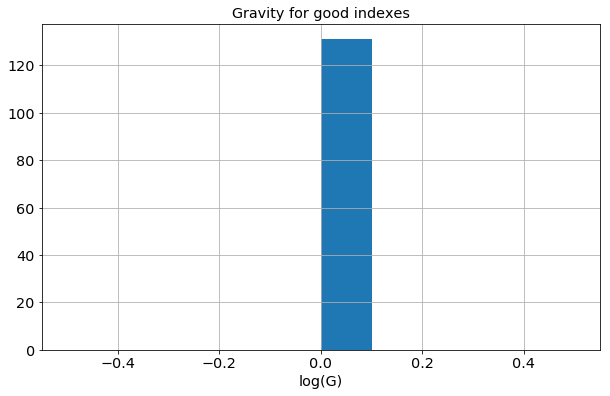

In [74]:
plt.hist(data[good_indexes,index_logg],bins=10);
plt.grid()
plt.title('Gravity for good indexes')
plt.xlabel('log(G)')

Text(0.5,0,'log(Z)')

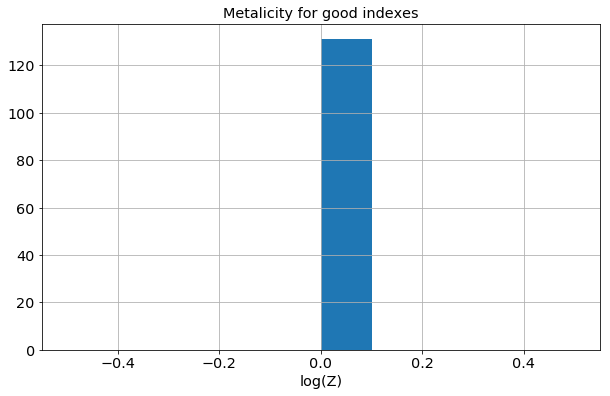

In [75]:
plt.hist(data[good_indexes,index_logg],bins=10);
plt.grid()
plt.title('Metalicity for good indexes')
plt.xlabel('log(Z)')

## Bad indexes

In [76]:
bad_indexes=np.where(data[0:,index_val]<=0)[0]

Text(0.5,0,'temperature')

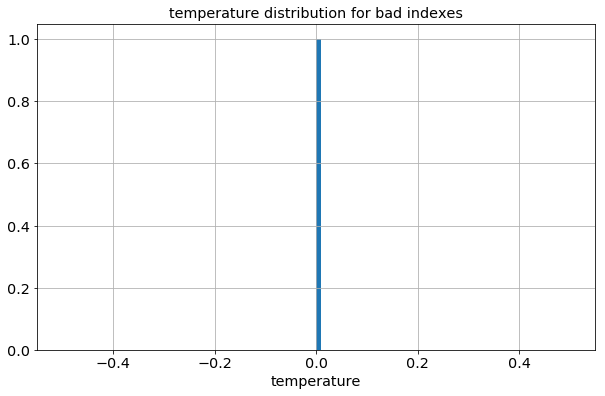

In [77]:
plt.hist(data[bad_indexes,index_temp],bins=100);
plt.grid()
plt.title('temperature distribution for bad indexes')
plt.xlabel('temperature')

Text(0.5,0,'log(G)')

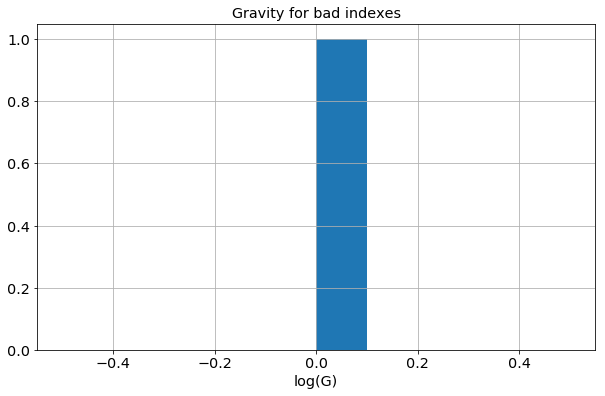

In [78]:
plt.hist(data[bad_indexes,index_logg],bins=10);
plt.grid()
plt.title('Gravity for bad indexes')
plt.xlabel('log(G)')

Text(0.5,0,'log(Z)')

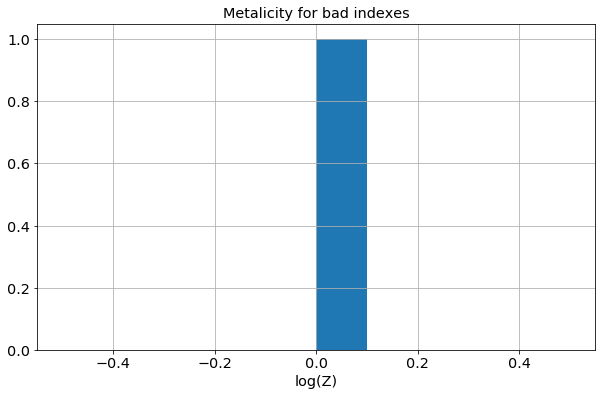

In [79]:
plt.hist(data[bad_indexes,index_logg],bins=10);
plt.grid()
plt.title('Metalicity for bad indexes')
plt.xlabel('log(Z)')

# Select good indexes

In [80]:
good_image=data[good_indexes,:]

In [81]:
good_image.shape

(131, 8515)

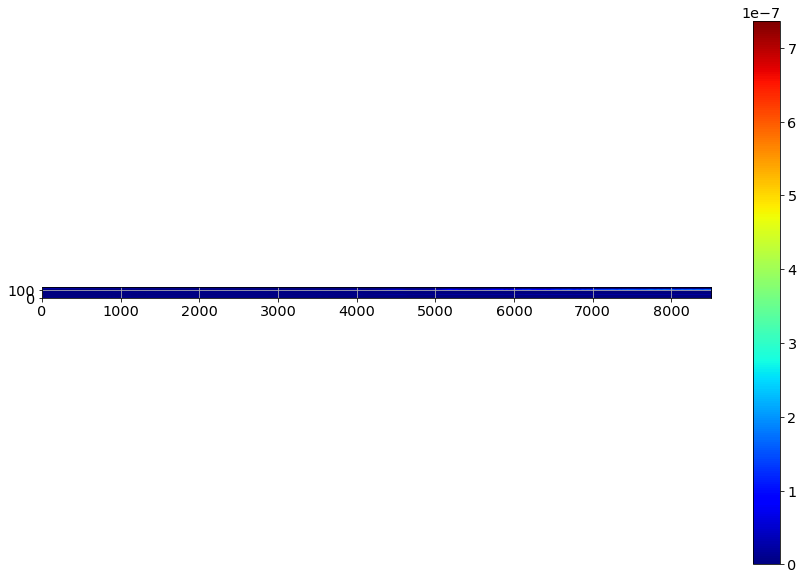

In [82]:
plt.figure(figsize=(15,10))   
img=plt.imshow(good_image[1:,index_spec:],origin='lower',cmap='jet')
plt.colorbar(img)
plt.grid(True)
plt.show()

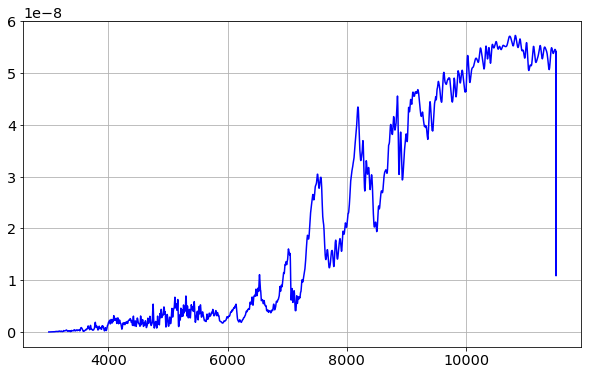

In [83]:
plt.plot(data[0,index_spec:],good_image[100,index_spec:],'b-')
plt.grid()

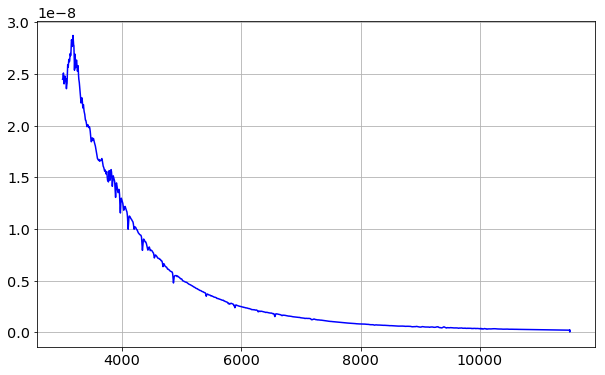

In [84]:
plt.plot(data[0,index_spec:],good_image[0,index_spec:],'b-')
plt.grid()

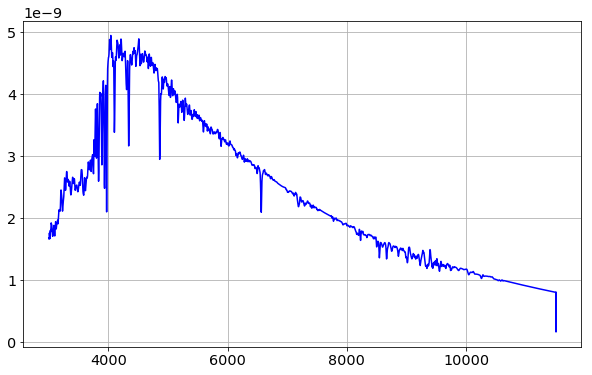

In [85]:
plt.plot(data[0,index_spec:],good_image[50,index_spec:],'b-')
plt.grid()